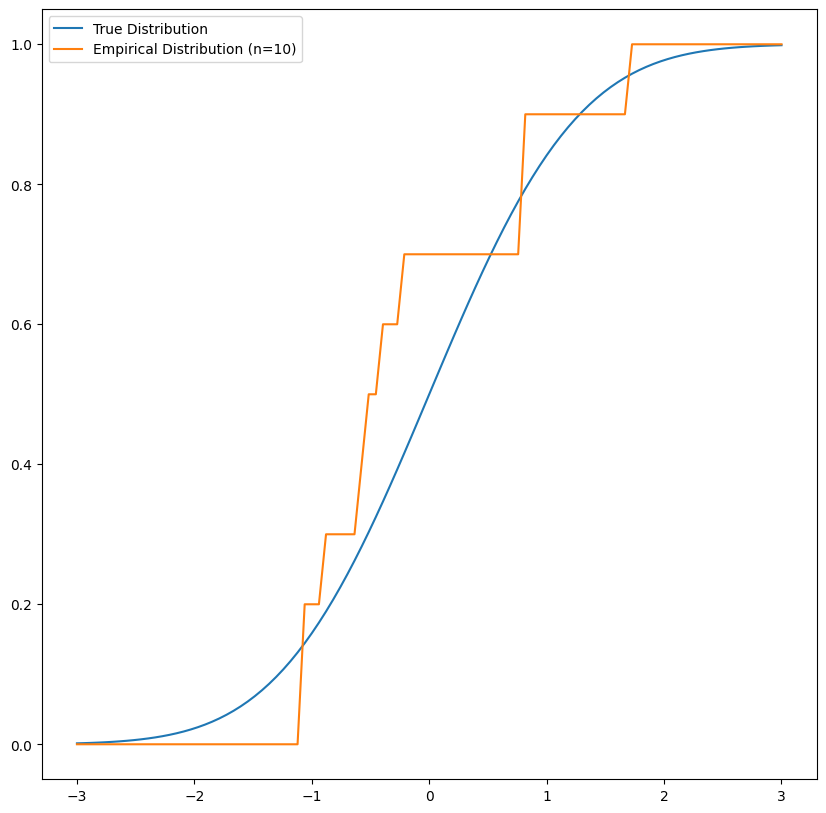

For n=10: sup(|F(x) - F_n(x)|) = 0.28399376431967954


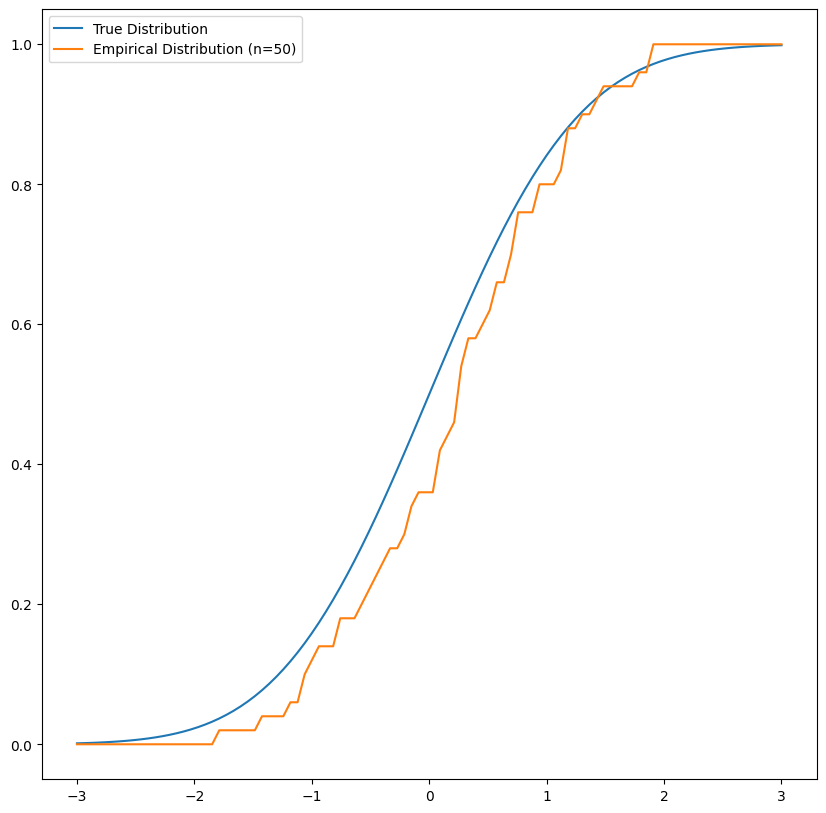

For n=50: sup(|F(x) - F_n(x)|) = 0.152087310074145


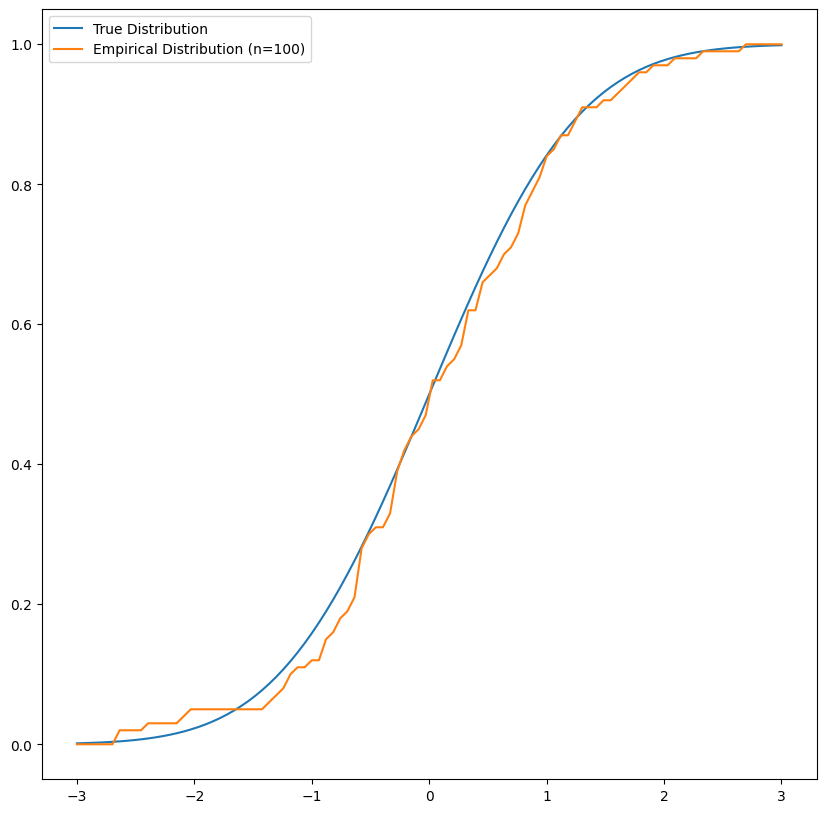

For n=100: sup(|F(x) - F_n(x)|) = 0.05376426176168697


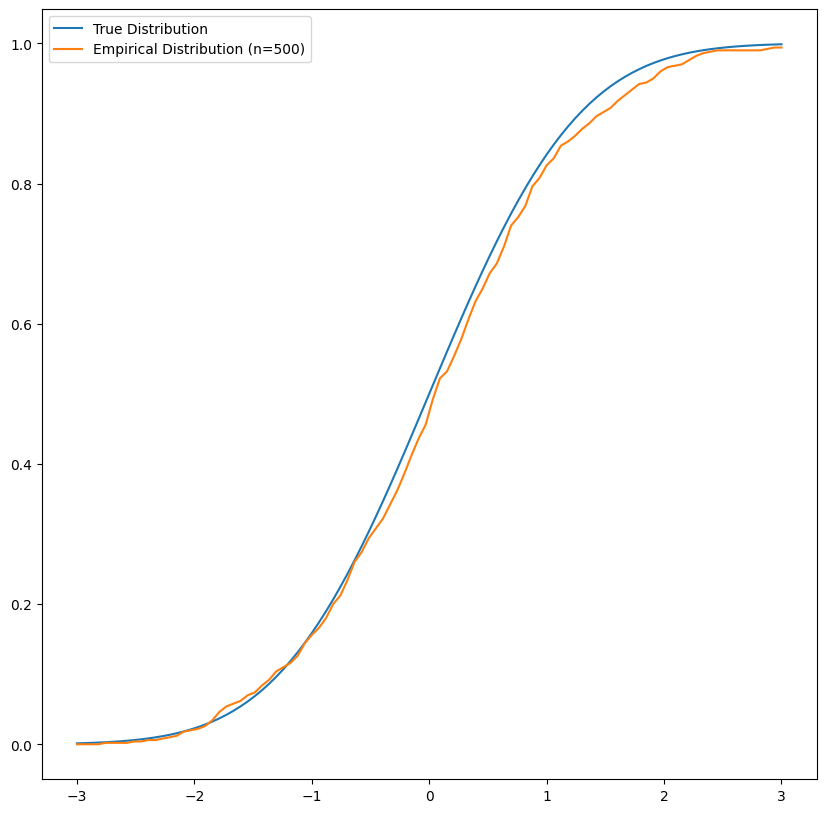

For n=500: sup(|F(x) - F_n(x)|) = 0.03191268992585505


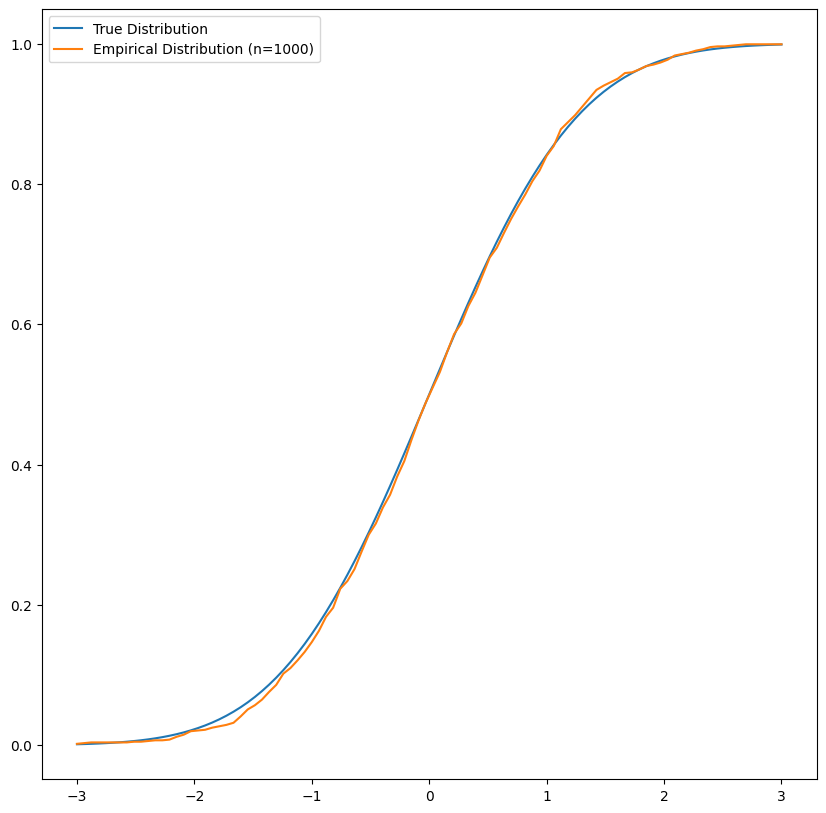

For n=1000: sup(|F(x) - F_n(x)|) = 0.015790352272814702


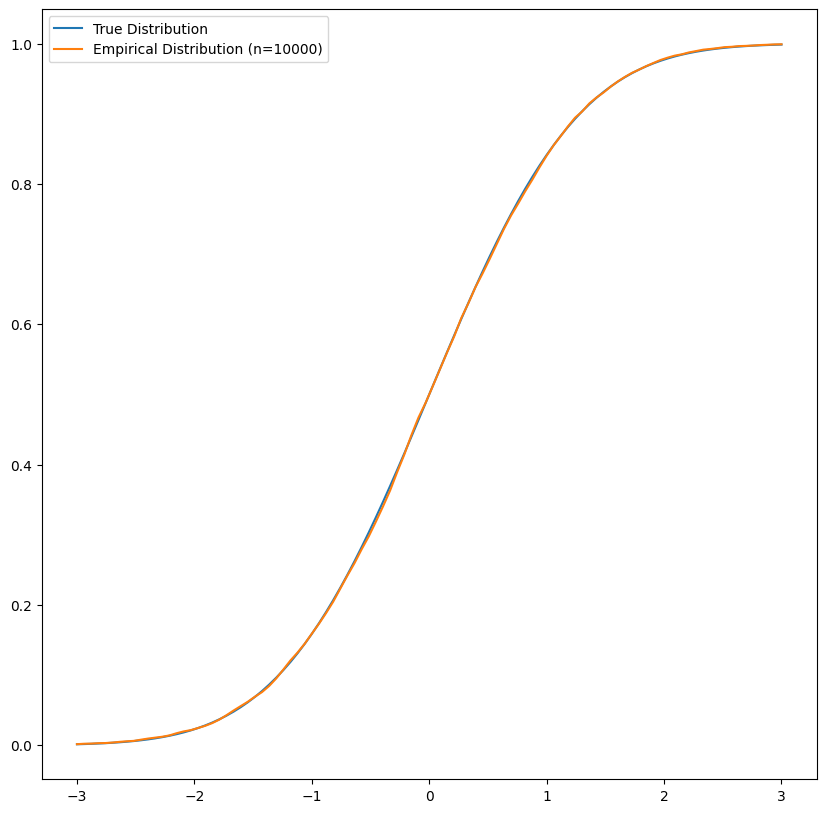

For n=10000: sup(|F(x) - F_n(x)|) = 0.00661289251520808


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Генеральная функция распределения нормального распределения
true_distribution = norm.cdf

# Функция для создания выборки из нормального распределения
def generate_sample(size):
    return np.random.normal(0, 1, size)

# Функция для вычисления эмпирической функции распределения
def empirical_distribution_function(sample, x):
    return np.sum(sample <= x) / len(sample)

# Различные размеры выборки
sample_sizes = [10, 50, 100, 500, 1000, 10000]

for size in sample_sizes:
    # Генерация выборки
    sample = generate_sample(size)

    # Вычисление эмпирической функции распределения
    empirical_distribution = np.vectorize(lambda x: empirical_distribution_function(sample, x))

    # Построение графиков
    x_values = np.linspace(-3, 3, 100)
    plt.figure(figsize=(10, 10))
    plt.plot(x_values, true_distribution(x_values), label='True Distribution')
    plt.plot(x_values, empirical_distribution(x_values), label=f'Empirical Distribution (n={size})')
    plt.legend()
    plt.show()

    # Проверка выполнения теоремы Гливенко-Кантелли
    supremum = np.max(np.abs(true_distribution(x_values) - empirical_distribution(x_values)))
    print(f"For n={size}: sup(|F(x) - F_n(x)|) = {supremum}")

# Т.к. супремум стремится к нулю с увеличением выборки, то теорема выполняется